<a href="https://colab.research.google.com/github/sgracevera/Clustering_Assignment/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pycaret.datasets import get_data
from pycaret.clustering import *
import pandas as pd


# Load wine dataset
data = get_data('wine')  # Assuming wine dataset is stored in a CSV file

# Check the data types of each column
print(data.dtypes)

# Convert the target column to numeric using label encoding
data['type'] = pd.factorize(data['type'])[0]

# Print the first few rows to verify the conversion
print(data.head())


# Preprocess the data with three different methods
#run code with different setups.
setup1 = setup(data, preprocess=True, normalize=True, normalize_method='zscore')
setup2 = setup(data, preprocess=True, pca=True, pca_method='linear', pca_components=0.70)


# Setup 1: Preprocessing with normalization using Z-score
#setup1 = setup(data, preprocess=True, normalize=True, normalize_method='zscore')

# Setup 2: Preprocessing with PCA and normalization using Z-score
#setup2 = setup(data, preprocess=True, pca=True, pca_method='linear', pca_components=0.95, normalize=True, normalize_method='zscore')

# Setup 3: Preprocessing with Yeo-Johnson transformation and PCA
#setup3 = setup(data, preprocess=True, transformation=True, transformation_method='yeo-johnson', pca=True, pca_method='linear', pca_components=0.95)

# Setup 4: Preprocessing with normalization using Z-score and Yeo-Johnson transformation and PCA
#setup4 = setup(data, preprocess=True, normalize=True, pca=True, pca_method='linear', normalize_method='zscore', transformation=True, transformation_method='yeo-johnson')

# Setup 5: Preprocessing with normalization using MinMaxScaler and PCA
#setup5 = setup(data, preprocess=True, normalize=True, normalize_method='minmax', pca=True, pca_method='linear', pca_components=0.95)

# Setup 6: Preprocessing with normalization using RobustScaler and PCA
#setup6 = setup(data, preprocess=True, normalize=True, normalize_method='robust', pca=True, pca_method='linear', pca_components=0.95)




fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0     

In [2]:
# Apply KMeans clustering algorithm with different cluster sizes
kmeans1 = create_model('kmeans', num_clusters=3)
kmeans2 = create_model('kmeans', num_clusters=4)
kmeans3 = create_model('kmeans', num_clusters=5)

# Assign clusters to data points for KMeans
kmeans1_predictions = assign_model(kmeans1)
kmeans2_predictions = assign_model(kmeans2)
kmeans3_predictions = assign_model(kmeans3)

# Print KMeans cluster predictions
print("KMeans Cluster Predictions:")
print("KMeans (num_clusters=3):")
print(kmeans1_predictions)
print("\nKMeans (num_clusters=4):")
print(kmeans2_predictions)
print("\nKMeans (num_clusters=5):")
print(kmeans3_predictions)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans Cluster Predictions:
KMeans (num_clusters=3):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38      

In [3]:
hclust1 = create_model('hclust', num_clusters=3)
hclust2 = create_model('hclust', num_clusters=4)
hclust3 = create_model('hclust', num_clusters=5)

# Assign clusters to data points for HClust
hclust1_predictions = assign_model(hclust1)
hclust2_predictions = assign_model(hclust2)
hclust3_predictions = assign_model(hclust3)

# Print HClust cluster predictions
print("\nHierarchical Clustering (HClust) Cluster Predictions:")
print("HClust (num_clusters=3):")
print(hclust1_predictions)
print("\nHClust (num_clusters=4):")
print(hclust2_predictions)
print("\nHClust (num_clusters=5):")
print(hclust3_predictions)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]


Hierarchical Clustering (HClust) Cluster Predictions:
HClust (num_clusters=3):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0          

In [4]:
birch1 = create_model('birch', num_clusters=3)
birch2 = create_model('birch', num_clusters=4)
birch3 = create_model('birch', num_clusters=5)

# Assign clusters to data points for birch
birch1_predictions = assign_model(birch1)
birch2_predictions = assign_model(birch2)
birch3_predictions = assign_model(birch3)

# Print birch cluster predictions
print("\nbirch Cluster Predictions:")
print("birch (num_clusters=3):")
print(birch1_predictions)
print("\nbirch (num_clusters=4):")
print(birch2_predictions)
print("\nbirch (num_clusters=5):")
print(birch3_predictions)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]


birch Cluster Predictions:
birch (num_clusters=3):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38       

In [5]:
# Evaluate each output with three specific parameters
evaluate_model(kmeans1)
evaluate_model(kmeans2)
evaluate_model(kmeans3)

evaluate_model(hclust1)
evaluate_model(hclust2)
evaluate_model(hclust3)

evaluate_model(birch1)
evaluate_model(birch2)
evaluate_model(birch3)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

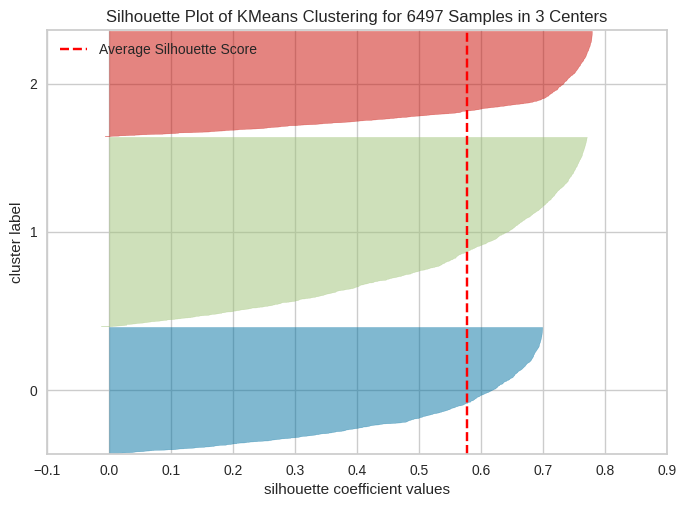

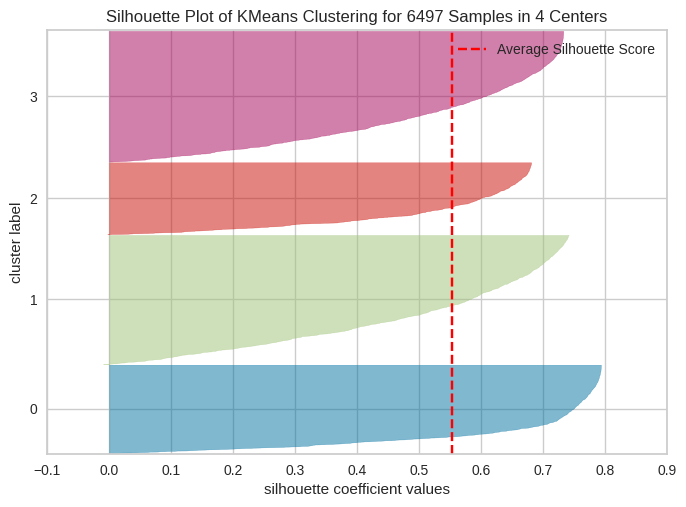

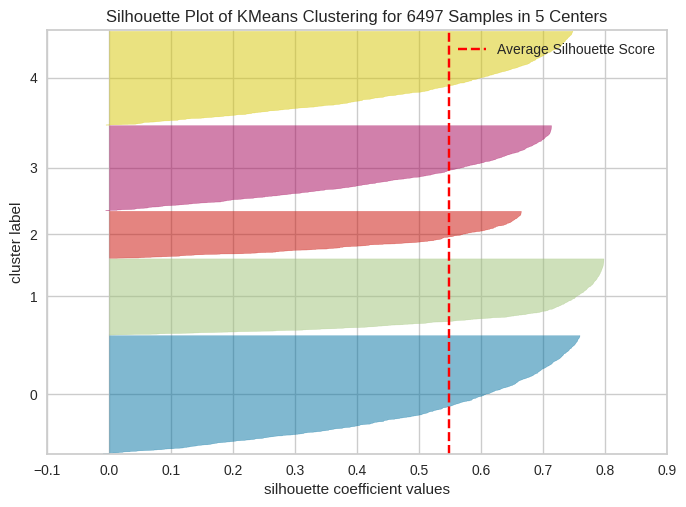

In [6]:
plot_model(kmeans1, plot='silhouette')
plot_model(kmeans2, plot='silhouette')
plot_model(kmeans3, plot='silhouette')

# Generate distribution plots for KMeans clustering with three different cluster sizes
plot_model(kmeans1, plot='distribution')
plot_model(kmeans2, plot='distribution')
plot_model(kmeans3, plot='distribution')



In [7]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for hierarchical clustering models
silhouette_scores = []

for model in [hclust1, hclust2, hclust3]:
    labels = model.labels_
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# Print silhouette scores
for i, score in enumerate(silhouette_scores, start=1):
    print(f"Silhouette Score for HClust{i}: {score}")


# Generate distribution plots for HClust clustering with three different cluster sizes
plot_model(hclust1, plot='distribution')
plot_model(hclust2, plot='distribution')
plot_model(hclust3, plot='distribution')



Silhouette Score for HClust1: 0.4455008569612477
Silhouette Score for HClust2: 0.43159957559444745
Silhouette Score for HClust3: 0.3801589797785084


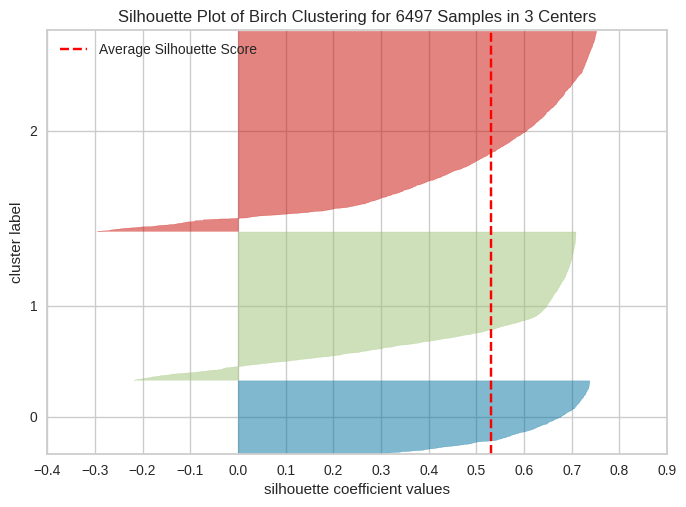

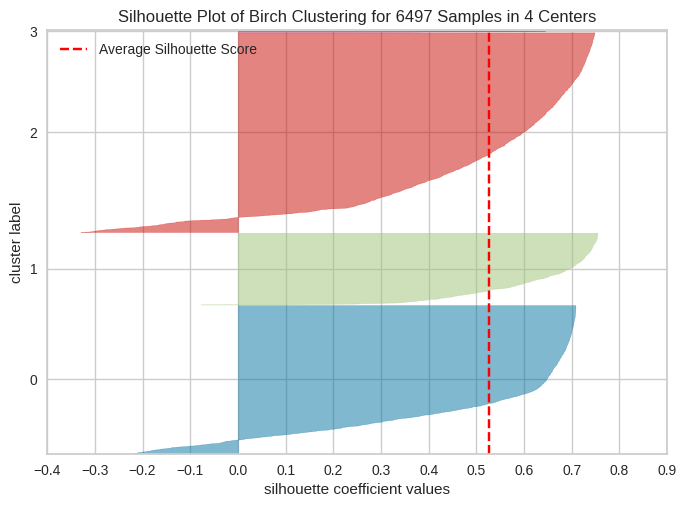

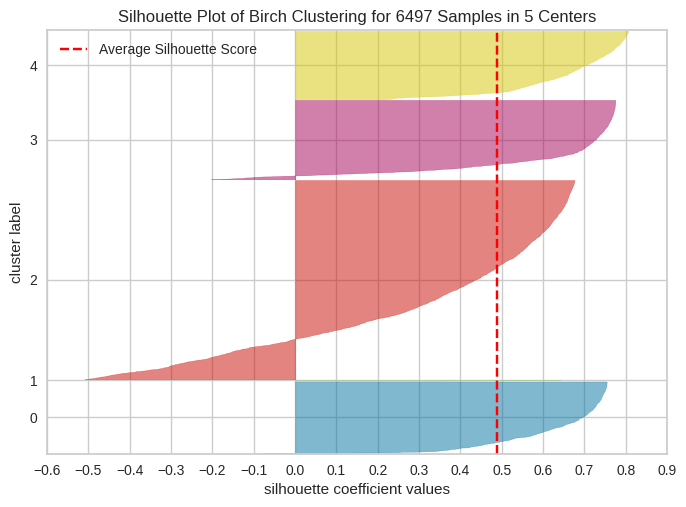

In [8]:
# Calculate silhouette scores for birch models
plot_model(birch1, plot='silhouette')
plot_model(birch2, plot='silhouette')
plot_model(birch3, plot='silhouette')

# Generate distribution plots for birch clustering with three different cluster sizes
plot_model(birch1, plot='distribution')
plot_model(birch2, plot='distribution')
plot_model(birch3, plot='distribution')

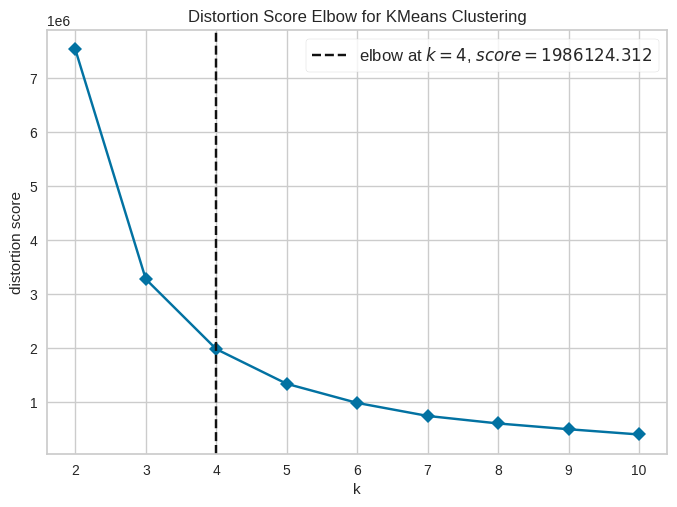

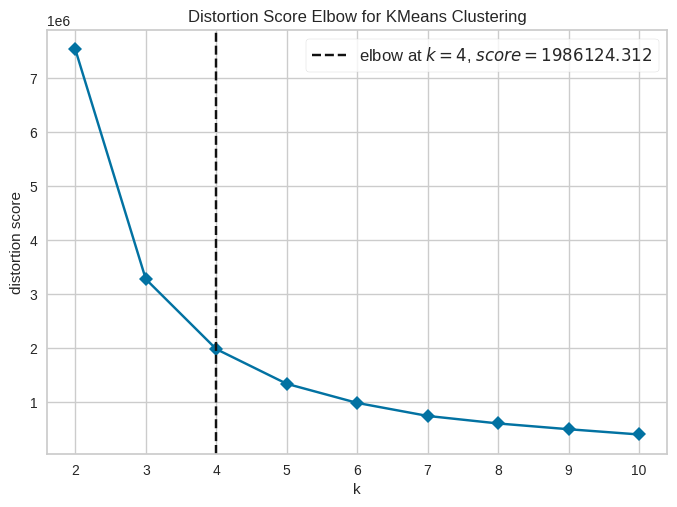

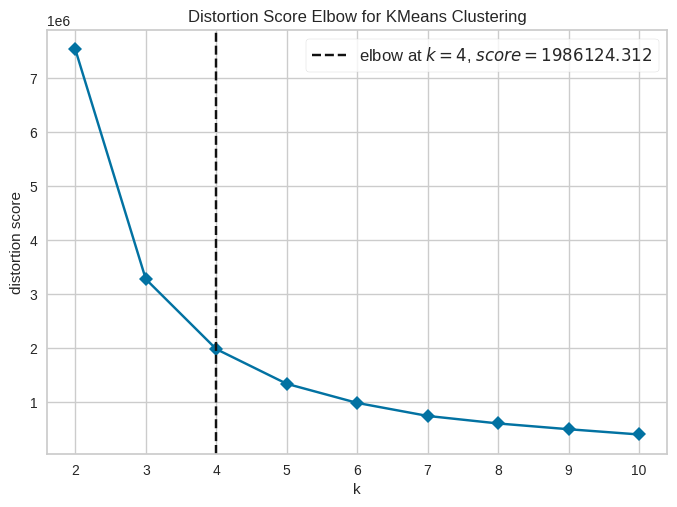

In [9]:
from pycaret.clustering import plot_model

# Plot elbow plot for kmeans1
plot_model(kmeans1, plot='elbow')

# Plot elbow plot for kmeans2
plot_model(kmeans2, plot='elbow')

# Plot elbow plot for kmeans3
plot_model(kmeans3, plot='elbow')


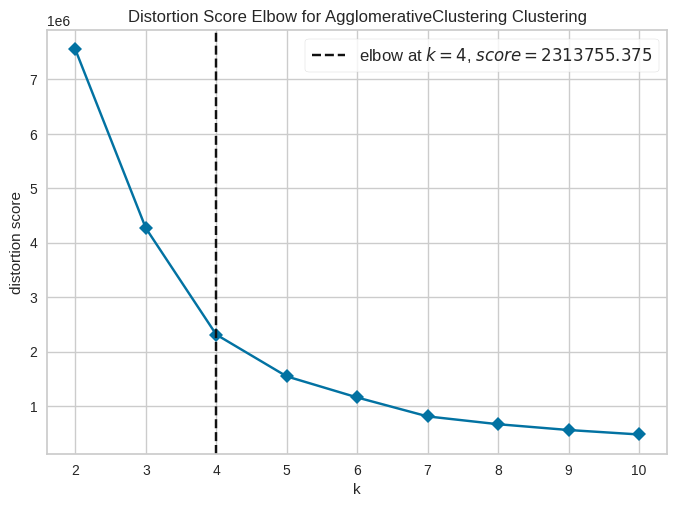

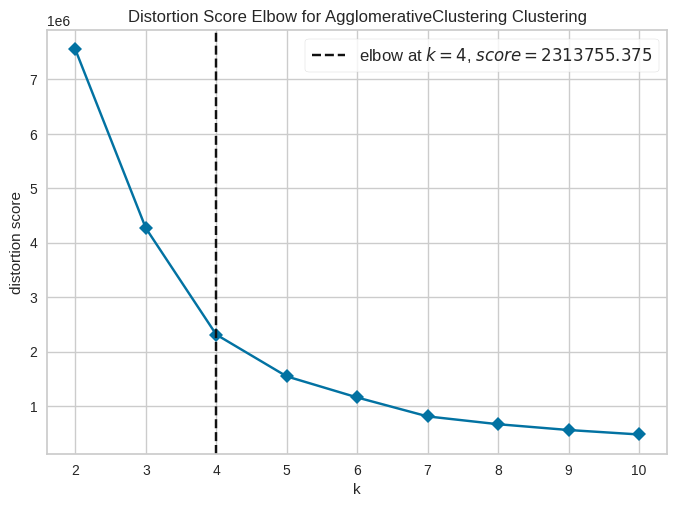

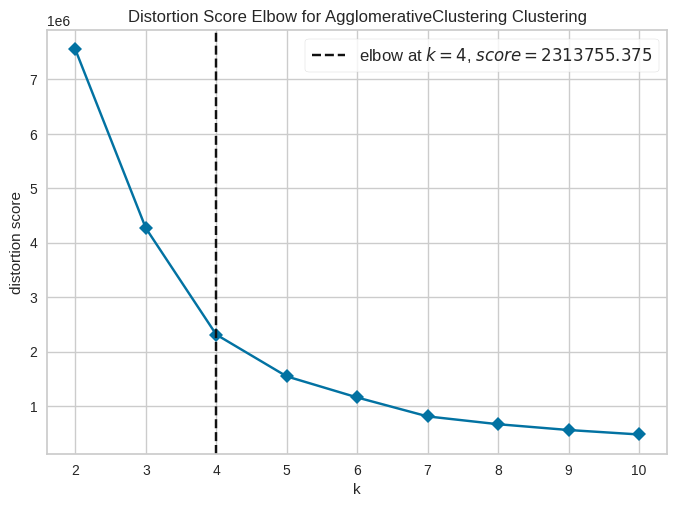

In [10]:
# Plot elbow plot for hclust1
plot_model(hclust1, plot='elbow')

# Plot elbow plot for hclust2
plot_model(hclust2, plot='elbow')

# Plot elbow plot for hclust3
plot_model(hclust3, plot='elbow')

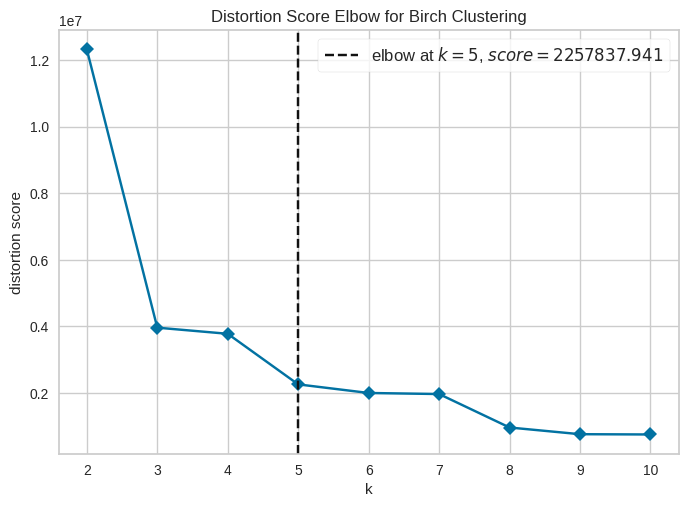

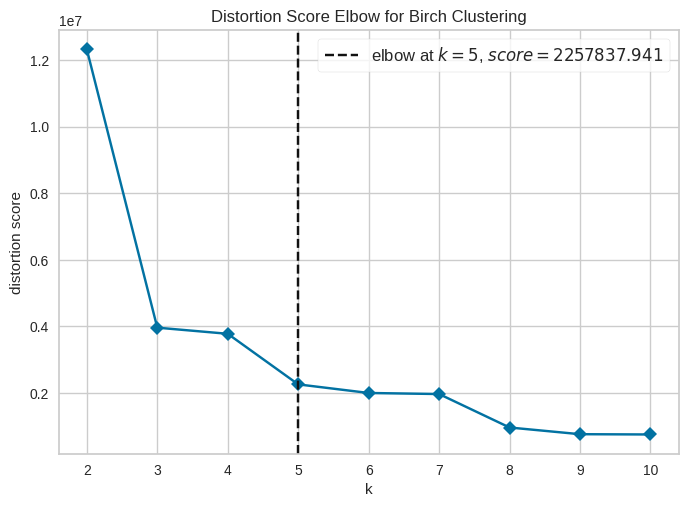

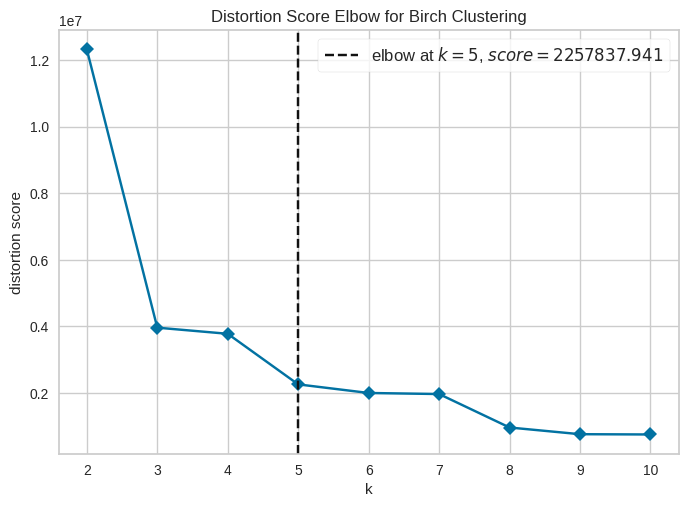

In [12]:
plot_model(birch1, plot='elbow')

# Plot elbow plot for birch2
plot_model(birch2, plot='elbow')

# Plot elbow plot for birch3
plot_model(birch3, plot='elbow')